<a href="https://colab.research.google.com/github/computablee/ACM-Hackathon-Drowziness-Detector/blob/main/ResNet_vs_VIT_small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow_addons

import numpy as np
import numpy.random as R
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.utils.data_utils import get_file
from tensorflow.keras import models, layers
import tensorflow.keras as keras
import tensorflow_addons as tfa

(_, _), (test_images, test_labels) = mnist.load_data()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00


In [8]:
test_images = test_images.astype('float32') / 255
nclassout = 10
test_labels_onehot = to_categorical(test_labels)

In [3]:
class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(Patches, self).__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

    def get_config(self):
        config = super(Patches, self).get_config()
        config.update({"patch_size": self.patch_size})
        return config

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super(PatchEncoder, self).get_config()
        config.update({"projection_dim": self.projection_dim, "num_patches": self.num_patches})
        return config

In [10]:
resnet = models.load_model('./small-resnet-mnist.hdf5')

evaluation_res = resnet.evaluate(test_images, test_labels_onehot)

print("Residual Network Accuracy: ", str(evaluation_res[1]))

313/313 [==============================] - 4s 8ms/step - loss: 0.0324 - accuracy: 0.9903
Residual Network Accuracy:  0.9902999997138977


In [9]:
vit = models.load_model('./small-vit-mnist.hdf5', custom_objects={'Patches': Patches, 'PatchEncoder': PatchEncoder})

evaluation_vit = vit.evaluate(test_images, test_labels)

print("ViT Network Accuracy: ", str(evaluation_vit[1]))

313/313 [==============================] - 5s 12ms/step - loss: 0.0516 - accuracy: 0.9836
ViT Network Accuracy:  0.9836000204086304


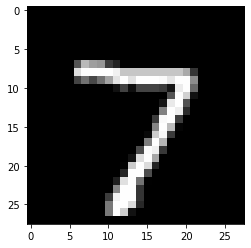

In [11]:
plt.imshow(test_images[0], cmap='gray', interpolation='none')

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


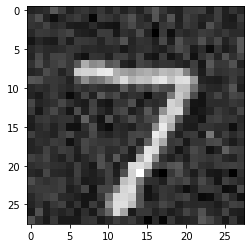

In [13]:
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images.astype('float32') / 255

R.seed(985)

noise = np.zeros(shape=(28, 28))

for x in range(28):
  for y in range(28):
    noise[x,y] += R.normal(0, 0.1)

for i in range(len(test_images)):
  test_images[i] += noise
  if i % 1000 == 0:
    print(str(i / len(test_images)))

plt.imshow(test_images[0], cmap='gray', interpolation='none')

In [14]:
evaluation_conv = resnet.evaluate(test_images, test_labels_onehot)

print("Residual Network Accuracy, noise=0.1: ", str(evaluation_conv[1]))

313/313 [==============================] - 4s 14ms/step - loss: 0.2115 - accuracy: 0.9062
Residual Network Accuracy, noise=0.1:  0.9061999917030334


In [15]:
evaluation_vit = vit.evaluate(test_images, test_labels)

print("Vision Transformer Accuracy, noise=0.1: ", str(evaluation_vit[1]))

313/313 [==============================] - 5s 17ms/step - loss: 0.0712 - accuracy: 0.9810
Vision Transformer Accuracy, noise=0.1:  0.9810000061988831


0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


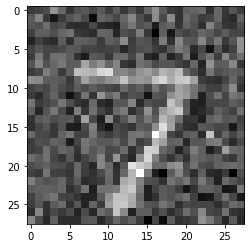

In [16]:
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images.astype('float32') / 255

R.seed(985)

noise = np.zeros(shape=(28, 28))

for x in range(28):
  for y in range(28):
    noise[x,y] += R.normal(0, 0.25)

for i in range(len(test_images)):
  test_images[i] += noise
  if i % 1000 == 0:
    print(str(i / len(test_images)))

plt.imshow(test_images[0], cmap='gray', interpolation='none')

In [17]:
evaluation_conv = resnet.evaluate(test_images, test_labels_onehot)

print("Residual Network Accuracy, noise=0.25: ", str(evaluation_conv[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.8063 - accuracy: 0.7547
Residual Network Accuracy, noise=0.25:  0.7547000050544739


In [18]:
evaluation_vit = vit.evaluate(test_images, test_labels)

print("Vision Transformer Accuracy, noise=0.25: ", str(evaluation_vit[1]))

313/313 [==============================] - 4s 14ms/step - loss: 0.1870 - accuracy: 0.9381
Vision Transformer Accuracy, noise=0.25:  0.9380999803543091


0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


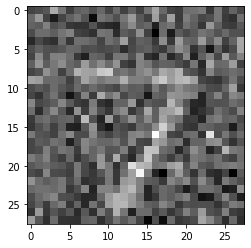

In [19]:
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images.astype('float32') / 255

R.seed(985)

noise = np.zeros(shape=(28, 28))

for x in range(28):
  for y in range(28):
    noise[x,y] += R.normal(0, 0.4)

for i in range(len(test_images)):
  test_images[i] += noise
  if i % 1000 == 0:
    print(str(i / len(test_images)))

plt.imshow(test_images[0], cmap='gray', interpolation='none')

In [20]:
evaluation_conv = resnet.evaluate(test_images, test_labels_onehot)

print("Residual Network Accuracy, noise=0.4: ", str(evaluation_conv[1]))

313/313 [==============================] - 2s 7ms/step - loss: 2.3205 - accuracy: 0.5118
Residual Network Accuracy, noise=0.4:  0.5117999911308289


In [21]:
evaluation_vit = vit.evaluate(test_images, test_labels)

print("Vision Transformer Accuracy, noise=0.4: ", str(evaluation_vit[1]))

313/313 [==============================] - 4s 12ms/step - loss: 0.4675 - accuracy: 0.8696
Vision Transformer Accuracy, noise=0.4:  0.8695999979972839
